# Project: Predicting heart disease

This notebook implements code using python and multiple libraries to predict heart disease as seen in the course *Complete Machine Learning & Data Science Bootcamp 2021* by Andrei Neagoie and Daniel Bourke. The notebook also contains comments and notes I considered relevant when going through the videos.

*Note*: I am using the "oceans16" theme locally from jupyterthemes and the plots have been edited to match this style. For this reason graphs might not look well without the theme (such as the GitHub preview).

**Framework:**
1. Defining the problem
2. Dataset
3. Defining metrics for success
4. Data features
5. Tools
6. Exploratory Data Analysis
7. Modelling
8. Experimentation

## 1. Defining the problem

As stated briefly at the beginning of the notebook, we want to predict if a person has heart disease or not by using relevant data from a clinical report. This means we want to classify individuals in a binary fashion as positive for heart disease or negative.

## 2. Dataset

The dataset we are using for the machine learning model is called *Heart Disease UCI* and it comes from *kaggle*. The file with the data is available in the "data" folder of this project with the name "heart-disease.csv". The file is also available online at: https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Defining metrics for success

The model will be considered viable if it can reach a $0.95$ accuracy score at classifying patients during the proof of concept.

## 4. Data features

What features does our dataset include?

When looking for the dataset on *kaggle* we can see what data does each of the 14 features record.

**Features:**
* age - age in years
* sex - classified binary:
    * 0: female
    * 1: male
* cp - cp stands for chest pain which was categorized into 4 types:
    * 0: Typical angina - related to a decrease in the blood supply to the heart
    * 1: Atypical angia - not related to the heart
    * 2: Non-anginal pain - esophageal spasms
    * 3: Asymptomatic - not showing signs of disease
* trestbps - resting blood pressure
* chol - serum cholestoral in mg/dl
* fbs - classified binary:
    * 0: subfasting blood sugar $\leq\$ 120 mg/dl
    
    * 1: subfasting blood sugar $>$ 120 mg/dl
* restecg - resting electrocardiographic results (classified into 3 groups):
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * 2: Possible or definite left ventricular hypertrophy
* thalach - maximum heart rate achieved
* exang - classified binary
    * 0: Without excercise induced angina
    * 1: With excercise induced angina
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment (classified into 3 groups):
    * 0: Upsloping
    * 1: Flatsloping
    * 2: Downsloping
* ca - number of major vessels (0-3) colored by flourosopy
* thal - thalium stress result
* target - classified binary:
    * 0: Without heart disease
    * 1: With heart disease

## 5. Tools

In [1]:
# Standard imports (data analysis and manipulation)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Parameter and hyperparameter management imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Style
!jt -t oceans16
from jupyterthemes import jtplot
jtplot.style()

## 6. Exploratory Data Analysis

Exploring our dataset allows us to feed the model cleaner data that allows it to find patterns with greater ease. On our data we might consider looking for the following:

1. Data types
2. Missing values
3. Outliers
4. Adding, changing or removing features
5. Balance

In [2]:
df = pd.read_csv("data/heart-disease.csv")

In [3]:
df.shape

(303, 14)

From the shape we can observe that the data is stored in a 2-dimensional matrix,  consisting of 303 rows and 14 columns.

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The `head()` function allows us to see the first 5 rows of our dataframe. Here we can see that the rows correspond to subjects and the columns include the features of our data.

In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


The `tail()` function shows the last 5 rows of the dataframe.

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

The `value_counts()` function allows us to see how many values does a feature have, and shows us how many times they are repeated. Our dataset contains 165 subjects with heart disease and 138 subjects without heart disease. 

Having a balanced amount of examples from each category might make it easier for our model to identify patterns.

It might be helpful to look at a plot that contains this information:

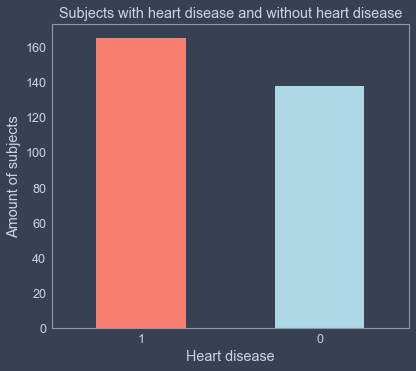

In [7]:
fig, ax = plt.subplots()
ax = df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
ax.set(title="Subjects with heart disease and without heart disease",
       xlabel="Heart disease",
       ylabel="Amount of subjects")
plt.xticks(rotation=0)
plt.grid(False);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The `info()` function allows us to look at the features (columns) of our dataframe and see the data types they contain.

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The `isna()` function will check if there are missing values in the dataframe and the `sum()` function will add up all the times this occured, for us to see how many missing values there are. As we can see all features have no missing values.

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The `describe()` function will show us the following information about each feature:
* The amount of values it contains
* The mean
* The standard deviation (std)
* The minimum value (min)
* The value of the first quartile (25%)
* The value of the median (50%)
* The value of the third quartile (75%)
* The maximum value.

**Sex Frequency**

In [11]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

As stated in the data features, a `1` represents a male subject and a `0` represents a female subject. By using `value_counts()` we can see that there are more males than females in our data.

**Heart Disease Frequency according to Sex**

In [12]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


The matrix shown above, obtained with pandas `crosstab()` function allows us to see how many males and how many females in the dataset had heart disease and how many did not.

**Matrix observations**

<b>*Females*</b>

$72$ females had heart disease and $24$ did **not** have herat disease.

$\frac{24}{24+72}\ \times\ 100 \% = 25 \%$ of the female subjects in the dataset did **not** have herat disease.

Therefore $75 \%$ of the females did have heart disease.

<b>*Males*</b>

$93$ males had heart disease while $114$ did **not** have heart disease.

$\frac{114}{114+93}\ \times\ 100 \% \approx\ 55.1 \%$ of the male subjects in the dataset did **not** have heart disease.

Therefore approximately $44.9 \%$ of the males did have heart disease.

**Some analysis**

From this proportions a machine learning model might be more likely to predict females as positive for heart disease, even if the other features might indicate the opposite, due to the fact that the training data contains more woman with heart disease than without and the model might give a lot of weight to the sex value.

**Visual intuition for the reader**

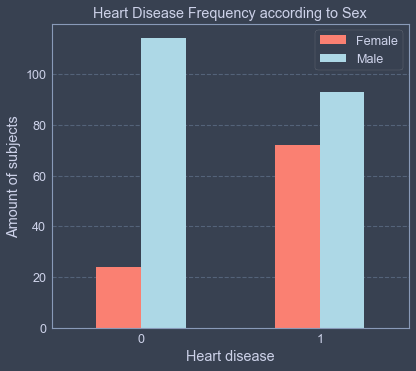

In [72]:
ax = pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["salmon", "lightblue"])
ax.set(title="Heart Disease Frequency according to Sex",
       xlabel="Heart disease",
       ylabel="Amount of subjects")
ax.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.grid(False)
ax.yaxis.grid(linestyle='dashed')
ax.set_axisbelow(1);

The red (salmon) bars allow us to see the proportions of females with heart disease and females without heart disease (the red bar on the right should be exactly 3 times the size of the one on the left). The light blue bars allow us to see the same proportion for males, it is not perfectly balanced, but it is clearly more balanced.

**Maximum heart rate**

In [14]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

On the bottom we can see `Length: 91`, this means that there are 91 different values for "thalach" (the maximum heart rate achieved) in our dataframe.

**Plotting Age vs Max Heart Rate**

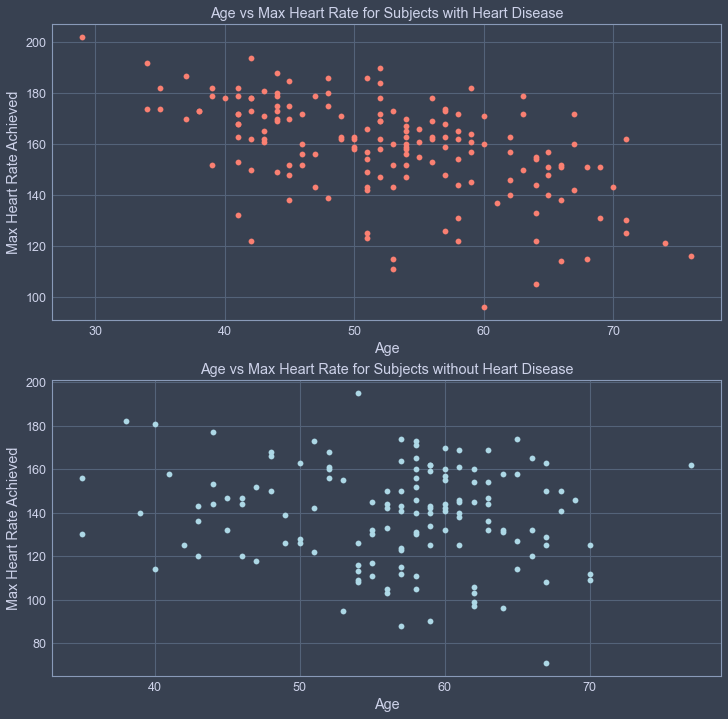

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(12, 12))

ax1.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

ax1.set(title="Age vs Max Heart Rate for Subjects with Heart Disease",
        xlabel = "Age",
        ylabel = "Max Heart Rate Achieved")

ax1.set_axisbelow(1)

ax2.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

ax2.set(title="Age vs Max Heart Rate for Subjects without Heart Disease",
        xlabel = "Age",
        ylabel = "Max Heart Rate Achieved")

ax2.set_axisbelow(1);

As one can see, there is a somewhat downward trend; thus, the data suggets that as age increases the max heart rate achieved decreases. However, this seems somewhat true for both classes (subjects with heart disease and subjects without heart disease) and the other variables should help our program cluster these groups. Let's look at both of them in a single plot...

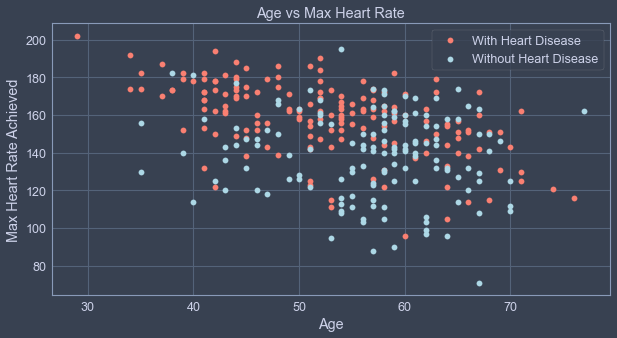

In [68]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

ax.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")


ax.set(title="Age vs Max Heart Rate",
        xlabel = "Age",
        ylabel = "Max Heart Rate Achieved")

ax.legend(["With Heart Disease", "Without Heart Disease"])

ax.set_axisbelow(1);

**Age distribution**

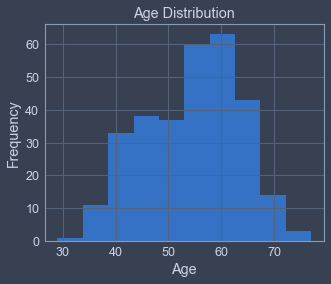

In [67]:
fig, ax = plt.subplots(figsize=(5,4))

ax.hist(df["age"])

ax.set(title="Age Distribution",
        xlabel = "Age",
        ylabel = "Frequency");

**Heart Disease Frequency per Chest Pain Type**

From our dataset features:

* cp - cp stands for chest pain which was categorized into 4 types:

    * 0: Typical angina - related to a decrease in the blood supply to the heart
    * 1: Atypical angia - not related to the heart
    * 2: Non-anginal pain - esophageal spasms
    * 3: Asymptomatic - not showing signs of disease

In [18]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


The data suggests that Atypical angia and Non-anginal pain are common signs of heart disease, is this always true?

Let's visualize the data...

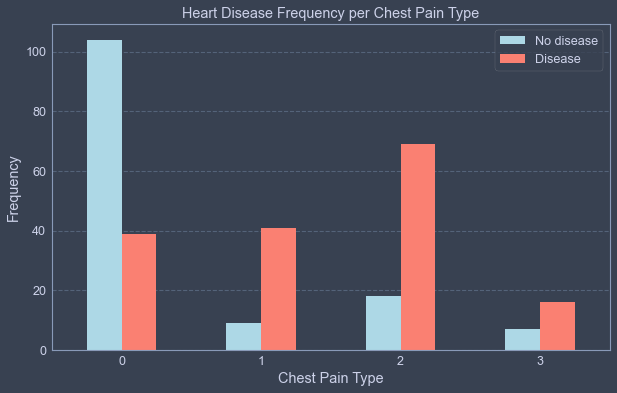

In [74]:
ax = pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                         figsize=(10, 6),
                                         color=["lightblue", "salmon"])
ax.set(title="Heart Disease Frequency per Chest Pain Type",
       xlabel="Chest Pain Type",
       ylabel="Frequency")

ax.legend(["No disease", "Disease"])

plt.xticks(rotation=0)

ax.grid(False)
ax.yaxis.grid(linestyle='dashed')
ax.set_axisbelow(1);

**Correlation matrix**

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Let's use a heatmap to plot our correlation matrix

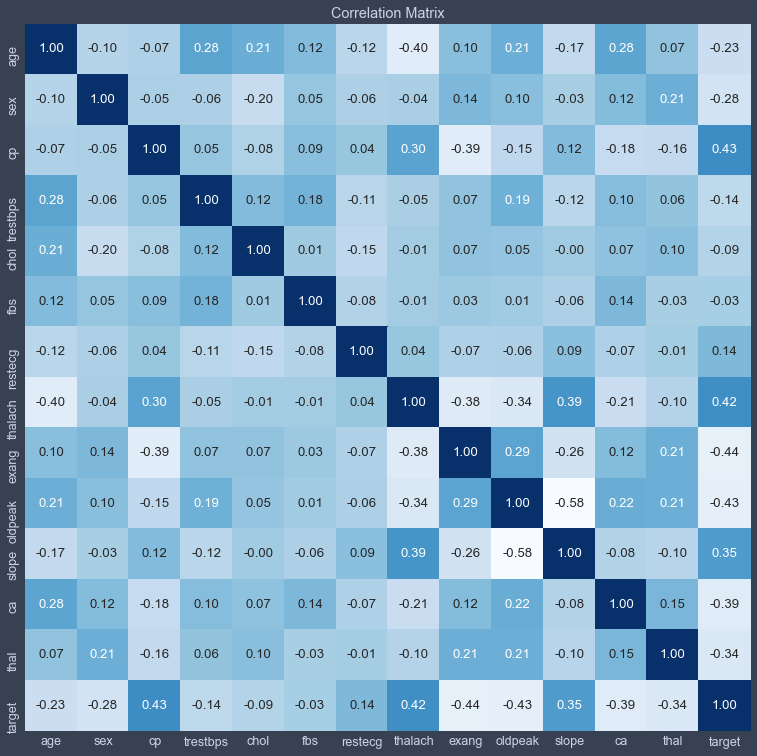

In [21]:
cor_m = df.corr()
fig, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(cor_m,
                 annot=True,
                 linewidths=0,
                 fmt=".2f",
                 cbar=False,
                 cmap="Blues")

ax.set(title="Correlation Matrix");

Using our heatmap we can look visually at which variables show more correlation between them (excluding of course the diagonal since that shows a feature against itself). With our color map the lightest squares will show that 2 variables have a negative correlation (as one variable increases the other decreases) and the darkest squares will show that 2 variables have a positive correlation (as one variable increases the other increases).

For our purposes, the most relevant column of the matrix is the last one since we can look at the correlation of a feature and heart disease. We can also get the same information when looking at the last row (if it is more comfortable).

## 7. Modelling

The desired model will try to predict if a patient has heart disease. To do so it will take as an input 13 different features and it will output either a 0 for no heart disease or a 1 for heart disease.

**Setting variables**

In [22]:
# Features variable (X)
X = df.drop("target", axis=1)

# Labels variable (Y)
Y = df["target"]

**Splitting our data to train and test the model**

In [23]:
# Let's use a seed for reproducible results
np.random.seed(42)

# We can split the data using a sklearn function (imported previously)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### 7.1 Choosing and fitting an estimator

Due to the nature of our project, as a classification model, we will try the following machine learning models:

* Logistic Regression
* K-Nearest Neighbors Classifier
* Random Forest Classifier

To fit and score models systematically we will create a dictionary containing the models, this will also be beneficial for hyperparameter modifications.

In [24]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Fit and score function
def fit_score(models, X_train, X_test, Y_train, Y_test):
    """
    This function will take estimators on a dictionary (models)
    It will fit the training data on the estimators (X_train, y_train)
    It will score the estimators on the test data (X_test, y_test)
    It will add the scores to a dictionary (model_scores)
    """
    model_scores = {}
    
    for key, value in models.items():
        # Fitting
        value.fit(X_train, Y_train)
        # Scoring
        model_scores[key] = value.score(X_test, Y_test)
    return model_scores

In [25]:
model_scores = fit_score(models=models, 
                         X_train=X_train,
                         X_test=X_test,
                         Y_train=Y_train,
                         Y_test=Y_test)
model_scores

C:\Users\joaco\Documents\MLProject\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

**Visual representation of the model scores**

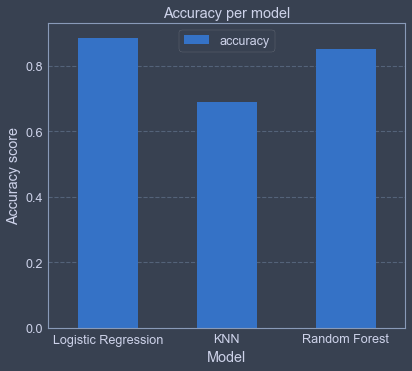

In [76]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
ax = model_compare.T.plot.bar()
ax.set(title="Accuracy per model",
       xlabel="Model",
       ylabel="Accuracy score")
plt.xticks(rotation=0)
plt.grid(0)
ax.yaxis.grid(linestyle='dashed')
ax.set_axisbelow(1);

Looking at the baseline models' accuracy scores, a logistic regression estimator seems to be a good model to pursue, a random forest classifier also seems to be viable. Improving the baseline models further might be possible by adjusting their hyperparameters.

In addition, accuracy is not the only metric we should look at when evaluating a model. Moreover, our train and test split might have been a lucky split for the logistic regression, we should also use cross validation to test the models further.

To test our models we will consider their:

* Confusion matrix
* Precision
* Recall
* F1
* ROC curve
* AUC

### 7.2 Improving the models

**KNN hyperparameter tuning (manually)**

In [27]:
test_scores = []

# n_neighbors hyperparameter
neighbors = range(1, 21)

# estimator instance
knn = KNeighborsClassifier()

# scoring estimator with different values for the hyperparameter
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)
    test_scores.append(knn.score(X_test, Y_test))

The maximum accuracy score on the test data was: 75.41%


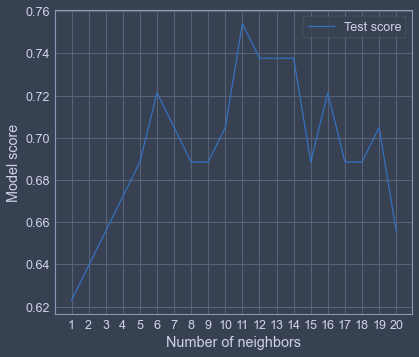

In [28]:
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"The maximum accuracy score on the test data was: {max(test_scores)*100:.2f}%");

After a little bit of tuning we can see that the KNN estimator hasn't reached the accuracy scores the other models got in the first try. Thus we won't keep fitting the data to this model.

**Cross validated hyperparameter tuning (randomly)**

Cross validation will split the test and train data in k different ways (called folds) and determine the best set of hyperparameters by scoring the model predictions with the different splits. We will use a 5-fold cross validation.

<b>*Logistic regression*</b>

We will check different values for "C" using a "liblinear" value for solver.

In [29]:
# Hyperparameter grid
log_grid = {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear"]}

In [30]:
np.random.seed(42)

# RandomizedSearchCV on the grid
rs_log = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_grid,
                           cv=5,
                           n_iter=20,
                           verbose=1)

# Fitting RandomizedSearchCV model
rs_log.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [31]:
# Best parameters
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
# New score
rs_log.score(X_test, Y_test)

0.8852459016393442

<b>*Random Forest Classifier*</b>

We will check different values for the number of estimators, the "max_depth", the "min_samples_split" and the "min_samples_leaf".

In [33]:
# Hyperparameter grid
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [34]:
np.random.seed(42)

# RandomizedSearchCV on the grid
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=1)

# Fitting RandomizedSearchCV model
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=1)

In [35]:
# Best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
# New score (with best hyperparameters)
rs_rf.score(X_test, Y_test)

0.8688524590163934

**Cross validated hyperparameter tuning (exhaustively)**

We will tune the Logisitc Regresion model exhaustively using GridSearchCV since it had the best accuracy score so far.

In [37]:
# Hyperparameter grid
log_grid = {"C": np.logspace(-4, 4, 30),
            "solver": ["liblinear"]}

# GridSearchCV
gs_log = GridSearchCV(LogisticRegression(),
                      param_grid=log_grid,
                      cv=5,
                      verbose=1)

# Fit best parameters model
gs_log.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=1)

In [38]:
# Best parameters (as found by GridSearchCV)
gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
# New accuracy
gs_log.score(X_test, Y_test)

0.8852459016393442

### 7.3 Further evaluation of the models

In [40]:
# Tuned Logistic Regerssion predictions
Y_preds = gs_log.predict(X_test)

**ROC Curve and AUC**

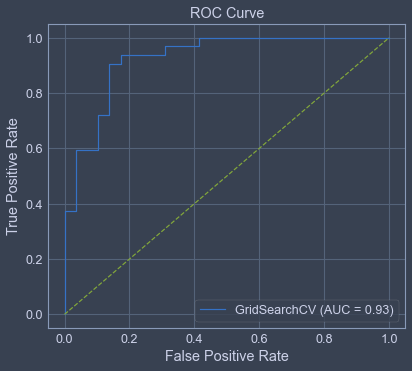

In [41]:
# Plot ROC curve
plot_roc_curve(gs_log, X_test, Y_test)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate");

**Confusion Matrix**

In [42]:
cm = confusion_matrix(Y_test, Y_preds)
print(cm)

[[25  4]
 [ 3 29]]


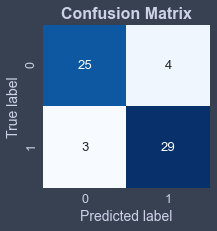

In [43]:
def conf_mat(Y_test, Y_preds):
    """
    Plots a confusion matrix using a heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot=True,
                     cbar=False,
                     cmap="Blues")
    # Title
    plt.title("Confusion Matrix")
    ax.title.set_fontsize(16)
    ax.title.set_weight('bold')
    
    # Y Axis
    plt.ylabel("True label")
    ax.yaxis.label.set_fontsize(14)
    
    # X Axis
    plt.xlabel("Predicted label")
    ax.xaxis.label.set_fontsize(14)
    
conf_mat(Y_test, Y_preds);

**Classification Report**

In [44]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



$\text{Precision} := \frac{\text{True positives}}{\text{True positives + False positives}}\$

$\text{Recall} := \frac{\text{True positives}}{\text{True positives + False negatives}}\$

$\text{F1} := 2 \frac{\text{(Precision)(Recall)}}{\text{Precision + Recall}}\$

**Cross-validated precision, recall and F1**

In [45]:
# Best parameters
gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# Define a classifier using the best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

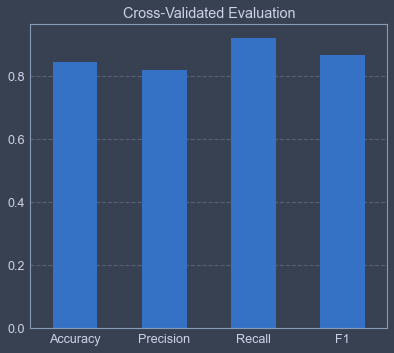

In [77]:
def cv_evaluate(model, X, Y):
    """
    Evaluate a model on different metrics using 5-fold cross-validation.
    """
    cv_metrics = {}
    cv_scoring = {"Accuracy": "accuracy",
                  "Precision": "precision",
                  "Recall": "recall",
                  "F1": "f1"}
    
    for key, value in cv_scoring.items():
        cv_metrics[key] = np.mean(cross_val_score(model, X, Y, cv=5, scoring=value))
    
    cv_report = pd.DataFrame(cv_metrics, index=[0])
    ax = cv_report.T.plot.bar(title="Cross-Validated Evaluation", legend=0)
    plt.xticks(rotation=0)
    plt.grid(0)
    ax.yaxis.grid(linestyle='dashed')
    ax.set_axisbelow(1)
    
cv_evaluate(clf, X, Y);

### 7.4 Feature Importance

Feature importance allows us to see which features contributed the most for our model to predict the target.

Finding feature importance is distinct for different estimators.

**Logistic Regression feature importance**

In [48]:
# Instantiate the estimator
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train, Y_train);

In [49]:
# Check coefficients
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [50]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_importance = pd.DataFrame(feature_dict, index=["Coefficient"])
feature_importance

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Coefficient,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


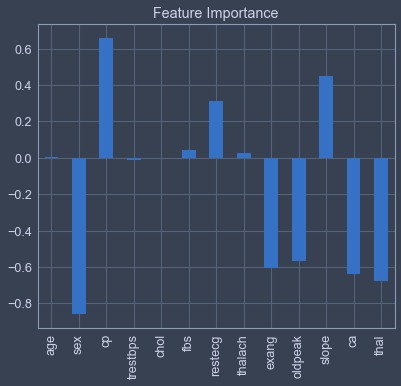

In [65]:
ax = feature_importance.T.plot.bar(title="Feature Importance", legend=0)
ax.set_axisbelow(1);

### 8. Experimentation

At this point we might consider the project finished (and if we just followed the course it would be by now, at least a baseline model) but there are many other things we can try. When making a machine learning project there are 2 things can go wrong...
1. **Having poor data**
    * The model finds patterns with the data it is trained on; thus, it can only be as good at predicting as the data it was given initially. Good data, gives good results.
2. **Choosing a poor model**
    * When facing a machine learning model we must make certain assumptions about the patterns in our data, when doing so we might end up overfitting or underfitting the data. OVerfitting happens when the model becomes so sensitive to the data that it finds patterns within the training data that are not consistent with reality, making it really good with the training data but inefficient with more data. Underfitting occurs when the model is not sensitive enough to find patterns in the training data and thus adjusts poorly.
    
Since we tried 3 distinct models that have proven efficient in classification problems by other programmers, in this experimentation stage I will look at manipulating the data to try and improve the results.

The first thing I am concerned of are categorical features that had more than 2 categories, this is due to the fact that the categories are distinguished by numbers and maybe the algorithm found an incorrect pattern with ascending/descending values. However, when this is done in a binary fashion (2 categories) the pattern found by the algorithm will be consistent as ascending values only correspond to one of the categories while descending values correspond to the other one.
To make all categories work in a binary way we can make a feature for each category and use a 1 if that category is met or a 0 if it is not.

### 8.1 Categorical Features

The following features were classified numerically into 3 or more groups:
* Chest pain (`cp`)
* Resting electrocardiographic results (`restecg`)
* The slope of the ST segment (`slope`)